In [ ]:
import json
from PIL import Image
import matplotlib.pyplot as plt
from graph_loader import GraphLoader

In [3]:
# Step 1: Read the JSON file
file_path = './data/test.json'  
with open(file_path, 'r') as file:
    data = [json.loads(line) for line in file]


In [ ]:
file_path = './data/test_positions_easy_mapped.json'  
with open(file_path, 'r') as file:
    positions = json.load(file)

In [5]:
file_path = './metadata/turns.json'  
with open(file_path, 'r') as file:
    turns = json.load(file)

In [6]:
file_path = './metadata/dense_turns.json'  
with open(file_path, 'r') as file:
    dense_turns = json.load(file)
dense_turns_path = "/data/claireji/panoids/"

In [7]:
file_path = './metadata/test_panoid_mapping.json'  
with open(file_path, 'r') as file:
    panoid_mapping = json.load(file)

In [8]:
graph = GraphLoader("./graph/aug_nodes.txt", "./graph/aug_links.txt").construct_graph()

===== Graph loaded =====
Number of nodes: 30255
Number of edges: 62188


In [9]:
id = 9758
for j, d in enumerate(data):
    if d['route_id'] == id:
        entry_idx = j
        break

In [15]:
entry_idx = 0
entry = positions[entry_idx]
route_id = entry.get("route_id")
print(f"Route ID: {route_id}")

ground_truth_position = entry.get("ground_truth_position", {})
mc_index = ground_truth_position.get("mc_index")
last_panoid = ground_truth_position.get("panoid")
lat_long = entry.get('lat_lng_path', [])

Route ID: 10983


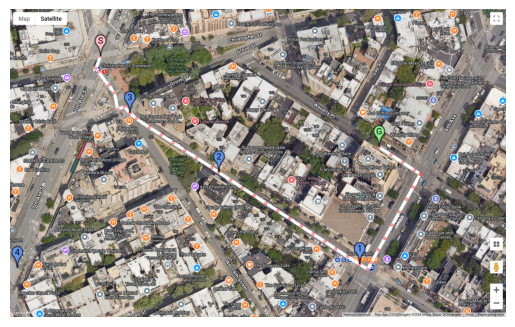

Displaying panoid: _psugSoFLJTOGs-bgfOBRw, AaClI1TAZDXaDFbD7AowOg


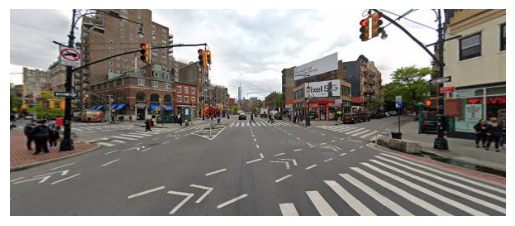

Turn: Forward, Lat/Long: [40.733685, -74.00278]

Displaying panoid: JEDrZGjSldMduPGNesgnuA, LgHkZH5ugqhvbxZWlobKgA


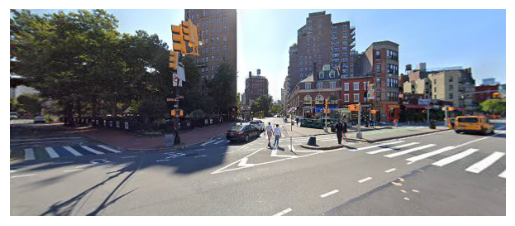

Turn: Left, Lat/Long: [40.733609, -74.00282]

Displaying panoid: pc5QXDNMFXkbLQd1sG3vQg, 70K9SgWQeBmPCNuE9U69kQ


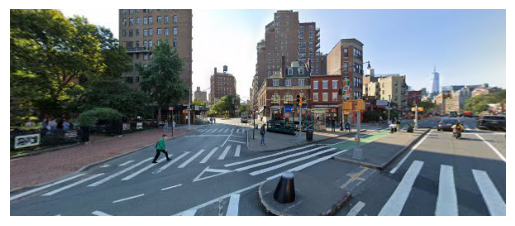

Turn: Forward, Lat/Long: [40.733587, -74.002799]

Displaying panoid: dtAX5YU607sEUSxPJA3aNg, Jm2Bpp1aHAj9mZ8J1E8cWg


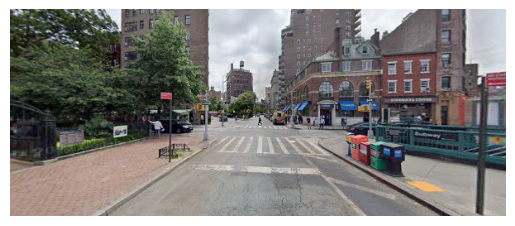

Turn: Forward, Lat/Long: [40.733501, -74.002713]

Displaying panoid: -zTidbF5wTEZ2JOpU6x50Q, wayVD61HjS1E_FjinDk84Q


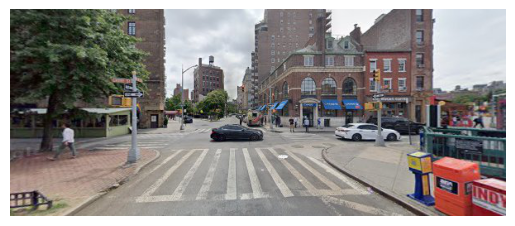

Turn: Right, Lat/Long: [40.733453, -74.002665]

Displaying panoid: hqpU0hLfmTlXMObOKF8bBQ, Pw4FjGBEsLFqCp2bQdmHtg


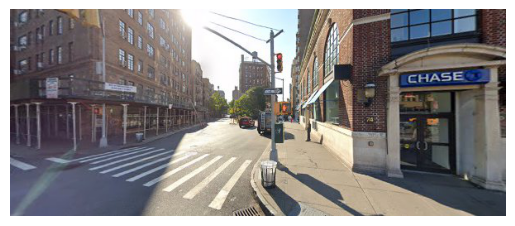

Turn: Left, Lat/Long: [40.733348, -74.002634]

Displaying panoid: EEdKvNoTr8S98Pnu3_F4Rw, ugqq7wHwaTwuB2hLssr7gQ


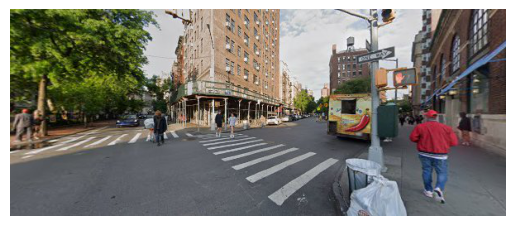

Turn: Right, Lat/Long: [40.733365, -74.002579]

Displaying panoid: 7bcDuizJKDpSpzGVYvNbZQ, 5wu28U37P-2M8mIT6p0OFg


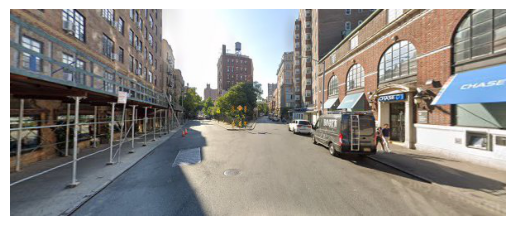

Turn: Forward, Lat/Long: [40.733323, -74.002532]



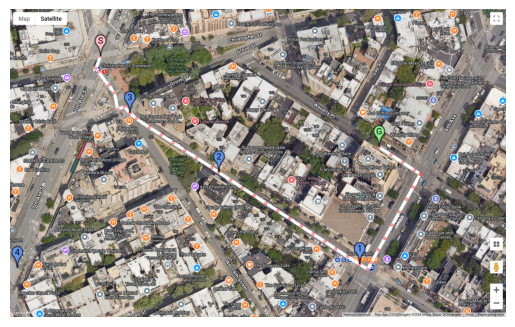

In [16]:

# Step 2: Process each entry in the JSON
entry = data[entry_idx]
if entry.get('route_id', 'unknown') != route_id:
    print(f"Route ID mismatch: {entry.get('route_id', 'unknown')} != {route_id}\n")

turns_entry = turns[entry_idx]
if turns_entry.get('route_id', 'unknown') != route_id:
    print(f"Route ID mismatch: {turns_entry.get('route_id', 'unknown')} != {route_id}\n")

turns_list = turns_entry.get('directions', [])

dense_turns_entry = dense_turns[entry_idx]
if dense_turns_entry.get('route_id', 'unknown') != route_id:
    print(f"Route ID mismatch: {dense_turns_entry.get('route_id', 'unknown')} != {route_id}\n")
dense_turns_list = dense_turns_entry.get('directions', [])

# Step 3: Load and display the map image
# map_filename = f'/data/claireji/maps/test_maps/test_route_{route_id}.png' 
map_filename = f'/data/claireji/maps/zoomed_maps/zoomed_map_route_{route_id}.png' 
try:
    img = Image.open(map_filename)
except FileNotFoundError:
    print(f"Map image {map_filename} not found.\n")

route_panoids = entry.get('route_panoids', [])

for i, panoid in enumerate(route_panoids):
    turn = turns_list[i]
    coord = lat_long[i]
    if turn["panoid_start"] != panoid:
        print(f"Turn mismatch: {turn['panoid_start']} != {panoid}\n")
    # for d_turn in dense_turns_list:
    #     if d_turn["start_panoid"] == panoid and d_turn["end_panoid"] == route_panoids[i+1]:
    #         for img_name in d_turn["images"]:
    #             panoid_img = Image.open(dense_turns_path + img_name)
    #             plt.imshow(panoid_img)
    #             plt.axis('off')
    #             plt.show()
    #             print(f"Displaying panoid: {img_name}")
# Display route details
    if i % 10 == 0:
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    panoID = panoid_mapping.get(panoid)
    neighbors = graph.nodes[panoid].neighbors
    heading = [h for h, n in neighbors.items() if n.panoid == route_panoids[i+1]][0]
    panoid_filename = f"/data/claireji/thumbnails/{panoID}_{heading}.jpg"  # Assuming each image is named by its panoid ID
    print(f"Displaying panoid: {panoid}, {panoID}")

    try:
        panoid_img = Image.open(panoid_filename)
        plt.imshow(panoid_img)
        plt.axis('off')
        plt.show()
        print(f"Turn: {turn['direction']}, Lat/Long: {coord}\n")
    except FileNotFoundError:
        print(f"Image for panoid {panoid} not found.\n")

    if panoid == last_panoid:
        break

plt.imshow(img)
plt.axis('off')
plt.show()



In [10]:
if mc_index is not None:
    print(f"Correct answer: {mc_index + 1}")
else:
    print("mc_index not found in ground_truth_position.")

Correct answer: 3
